         loss  accuracy  val_loss  val_accuracy  epoch
0    1.307234  0.636318  0.573365      0.838520      0
1    0.408197  0.884442  0.416861      0.873641      1
2    0.300565  0.912456  0.402134      0.880015      2
3    0.216778  0.934967  0.354361      0.892763      3
4    0.183358  0.950975  0.345844      0.896638      4
..        ...       ...       ...           ...    ...
495  0.000003  1.000000  0.831735      0.911636    495
496  0.000003  1.000000  0.833181      0.911761    496
497  0.000003  1.000000  0.834281      0.911636    497
498  0.000003  1.000000  0.835481      0.911636    498
499  0.000003  1.000000  0.836676      0.911511    499

[500 rows x 5 columns]


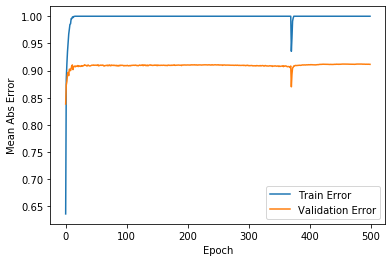

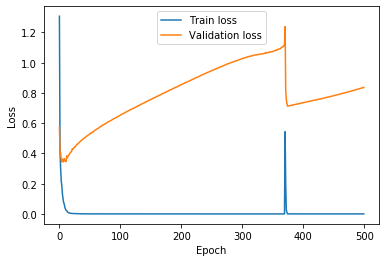

In [1]:
"""
例題4：MNIST - 手書き文字認識（画像認識）
@author: t.imai
"""
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

 
from tensorflow import keras
from tensorflow.keras import layers

# 入力する部分
max_epochs = 500                       # 訓練のステップの数
# 入力データのうち、訓練に使うデータの割合。0.8であれば、80%が訓練に、20％が確認に使われる。
ratio_for_training = 0.8      
filename_data = 'ex4_MNIST_data.csv'    # データのファイル名
explanatory_start_column = 1      # 説明変数の最初の列の列番号
explanatory_end_column = 784     # 説明変数の最後の列の列番号
outcome_start_column = 785      # 目的変数の最初の列番号
outcome_end_column = 794      # 目的変数の最後の列番号
# 入力はここまで

'''
データの読み込み
'''
explanatory_variables = np.arange(explanatory_start_column-1, 
                                  explanatory_end_column)    
outcome_variables = np.arange(outcome_start_column-1, outcome_end_column)

df = pd.read_csv(filename_data, skiprows=[0], header=None)
df1 = np.array(df.values.tolist())    

# 列でXとYを分ける。上で指定した列の番号で分割する。
x_train = df1[:, explanatory_variables]
y_train = df1[:, outcome_variables]
    
# 入力データを正規化
#x_min = x_train.min(axis=0)
#x_max = x_train.max(axis=0)
#x_train = (x_train - x_min)/(x_max - x_min)
x_train=x_train/255.0

# モデルの構築
model = tf.keras.models.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'), 
  keras.layers.Dense(64, activation='relu'),     
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=max_epochs, validation_split=ratio_for_training, verbose=0)

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
 
  print(hist)

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label='Validation Error')
  plt.legend()
 
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label='Validation loss')
  plt.legend()
  plt.show()

plot_history(history)